In [1]:
import itertools
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from os.path import join
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder

In [2]:
labels = pd.read_csv('labels.csv') 

In [3]:
labels.head()

,model,type
0,b5025746-e58f-4696-837c-5b21808b7ae9,Torus
1,30a730ca-c466-4e8c-b00b-bf7b317495e2,Cone
2,7d0c7362-1e8d-4008-b444-cdf111e06ce9,Sphere
3,d58d68a4-7acb-48d8-96bd-71f1eca1affe,Sphere
4,df907d43-7c4f-4ccd-9350-0d84c41dba54,Cube


Уберем в type цифры и точки.

In [4]:
labels['type'] = labels['type'].str.replace('.\d+', '', regex=True)

Соберем датасет из гистограмм.

In [5]:
path_to_json = 'histograms/'
json_files = os.listdir(path_to_json)

In [6]:
res = {}

In [7]:
for file_name in json_files:
    with open(join(path_to_json, file_name), 'rb') as f:
        res[file_name.replace('.json', '')] = json.loads(f.read())['histogram_data']

In [8]:
data = pd.DataFrame(res['11c5e331-a33e-4350-b72b-cdc0df89c1ed'])
data['model'] = '11c5e331-a33e-4350-b72b-cdc0df89c1ed'

In [9]:
data.head()

,type,intervals,data,model
0,model_bounding_sphere_strict_outer,8,"[0.1349800995912831, 0.15335719002659337, 0.28...",11c5e331-a33e-4350-b72b-cdc0df89c1ed
1,model_bounding_sphere_strict_outer_absolute,8,"[0.04169448485854208, 0.047371049931609975, 0....",11c5e331-a33e-4350-b72b-cdc0df89c1ed
2,model_bounding_sphere_missed,8,"[0, 0, 0.07517723367882632, 0.1657911677918522...",11c5e331-a33e-4350-b72b-cdc0df89c1ed
3,model_bounding_sphere_concentric_sphere,8,"[0, 0.06527780256652804, 0.14161684127862356, ...",11c5e331-a33e-4350-b72b-cdc0df89c1ed
4,model_bounding_sphere_strict_outer,16,"[0.031147263024505167, 0.10383283656677791, 0....",11c5e331-a33e-4350-b72b-cdc0df89c1ed


In [10]:
for i in list(res.keys())[1:]:
    df = pd.DataFrame(res[i])
    df['model'] = i
    data = pd.concat([data, df], axis=0)

In [11]:
data.head()

,type,intervals,data,model
0,model_bounding_sphere_strict_outer,8,"[0.1349800995912831, 0.15335719002659337, 0.28...",11c5e331-a33e-4350-b72b-cdc0df89c1ed
1,model_bounding_sphere_strict_outer_absolute,8,"[0.04169448485854208, 0.047371049931609975, 0....",11c5e331-a33e-4350-b72b-cdc0df89c1ed
2,model_bounding_sphere_missed,8,"[0, 0, 0.07517723367882632, 0.1657911677918522...",11c5e331-a33e-4350-b72b-cdc0df89c1ed
3,model_bounding_sphere_concentric_sphere,8,"[0, 0.06527780256652804, 0.14161684127862356, ...",11c5e331-a33e-4350-b72b-cdc0df89c1ed
4,model_bounding_sphere_strict_outer,16,"[0.031147263024505167, 0.10383283656677791, 0....",11c5e331-a33e-4350-b72b-cdc0df89c1ed


Присоединим эту таблицу к labels.

In [12]:
left_merged = pd.merge(data, labels,
                        how="left", on=["model", "model"])
left_merged.head()

,type_x,intervals,data,model,type_y
0,model_bounding_sphere_strict_outer,8,"[0.1349800995912831, 0.15335719002659337, 0.28...",11c5e331-a33e-4350-b72b-cdc0df89c1ed,Cylinder
1,model_bounding_sphere_strict_outer_absolute,8,"[0.04169448485854208, 0.047371049931609975, 0....",11c5e331-a33e-4350-b72b-cdc0df89c1ed,Cylinder
2,model_bounding_sphere_missed,8,"[0, 0, 0.07517723367882632, 0.1657911677918522...",11c5e331-a33e-4350-b72b-cdc0df89c1ed,Cylinder
3,model_bounding_sphere_concentric_sphere,8,"[0, 0.06527780256652804, 0.14161684127862356, ...",11c5e331-a33e-4350-b72b-cdc0df89c1ed,Cylinder
4,model_bounding_sphere_strict_outer,16,"[0.031147263024505167, 0.10383283656677791, 0....",11c5e331-a33e-4350-b72b-cdc0df89c1ed,Cylinder


In [13]:
left_merged.type_x.unique()

array(['model_bounding_sphere_strict_outer',
       'model_bounding_sphere_strict_outer_absolute',
       'model_bounding_sphere_missed',
       'model_bounding_sphere_concentric_sphere',
       'hull_bounding_sphere_strict_outer',
       'hull_bounding_sphere_strict_outer_absolute',
       'hull_bounding_sphere_missed',
       'hull_bounding_sphere_concentric_sphere'], dtype=object)

In [14]:
left_merged

,type_x,intervals,data,model,type_y
0,model_bounding_sphere_strict_outer,8,"[0.1349800995912831, 0.15335719002659337, 0.28...",11c5e331-a33e-4350-b72b-cdc0df89c1ed,Cylinder
1,model_bounding_sphere_strict_outer_absolute,8,"[0.04169448485854208, 0.047371049931609975, 0....",11c5e331-a33e-4350-b72b-cdc0df89c1ed,Cylinder
2,model_bounding_sphere_missed,8,"[0, 0, 0.07517723367882632, 0.1657911677918522...",11c5e331-a33e-4350-b72b-cdc0df89c1ed,Cylinder
3,model_bounding_sphere_concentric_sphere,8,"[0, 0.06527780256652804, 0.14161684127862356, ...",11c5e331-a33e-4350-b72b-cdc0df89c1ed,Cylinder
4,model_bounding_sphere_strict_outer,16,"[0.031147263024505167, 0.10383283656677791, 0....",11c5e331-a33e-4350-b72b-cdc0df89c1ed,Cylinder
...,...,...,...,...,...
51675,hull_bounding_sphere_concentric_sphere,64,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",094917b7-de47-4741-905b-55784f709637,Cube
51676,hull_bounding_sphere_strict_outer,128,"[0, 0, 0, 0.00013909204815321102, 0.0017648728...",094917b7-de47-4741-905b-55784f709637,Cube
51677,hull_bounding_sphere_strict_outer_absolute,128,"[0, 0, 0, 6.725983964592656e-05, 0.00085342812...",094917b7-de47-4741-905b-55784f709637,Cube
51678,hull_bounding_sphere_missed,128,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",094917b7-de47-4741-905b-55784f709637,Cube


In [15]:
# compression_opts = dict(method='zip', archive_name='data_hist.csv')  
# left_merged.to_csv('data.zip', index=False, compression=compression_opts)

Кластеризуем для модели model_bounding_sphere_strict_outer_absolute при 128 бинах. И изобразим это на графике, понизив размерность.

In [16]:
dataset_1 = left_merged[(left_merged.intervals == 128) & 
                     (left_merged.type_x == 'model_bounding_sphere_strict_outer_absolute')][['type_y', 'data']]

In [17]:
unique_labels = labels['type'].unique()
unique_labels

array(['Torus', 'Cone', 'Sphere', 'Cube', 'Cylinder'], dtype=object)

In [18]:
label_encoder = LabelEncoder()

cur_fit = LabelEncoder().fit(unique_labels)
unique_coded_labels = cur_fit.transform(unique_labels)
print(unique_coded_labels)

[4 0 3 1 2]


In [19]:
dict_models = {}
for i in range(len(unique_coded_labels)):
    dict_models[unique_labels[i]] = unique_coded_labels[i]
dict_models    

{'Torus': 4, 'Cone': 0, 'Sphere': 3, 'Cube': 1, 'Cylinder': 2}

In [20]:
def find_label_predict(dataset):
    X = np.array(dataset['data'].tolist())
    
    pca = PCA(2)
    df = pca.fit_transform(X)
    
    kmeans = KMeans(n_clusters = len(unique_labels))
    label = kmeans.fit_predict(df)
    return df, label

In [21]:
df, label = find_label_predict(dataset_1)

In [22]:
def draw_pred(df, label):
    for i in unique_coded_labels:
        plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#     plt.legend(labels=unique_labels)
    plt.legend()
    plt.show()    

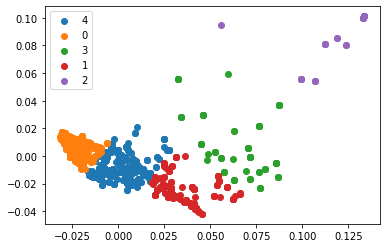

In [23]:
draw_pred(df, label)

Посмотрим, как на самом деле выглядят наши данные.

In [24]:
def find_real_predict(dataset):
    label_real = []
    for i in dataset.type_y.tolist():
        label_real.append(dict_models[i])  
    return label_real    

In [25]:
label_real = find_real_predict(dataset_1)

In [26]:
def draw_real(df, label_real):
    for i in unique_coded_labels:
        plt.scatter(df[label_real == i , 0] , df[label_real == i , 1] , label = i)
    plt.legend(labels=unique_labels)
    plt.show()    

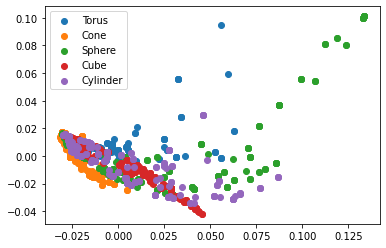

In [27]:
draw_real(df, label_real)

Оценим качество реализованного алгоритма с помощью метрики качества Davies-Bouldin index.

In [28]:
davies_bouldin_score(np.vstack(dataset_1['data'].values), label)

1.1029110928197594

Получили плохие результаты.

Теперь попробуем взять все гистограммы при 128 бинах.

In [29]:
new_data = left_merged[(left_merged.intervals == 128)][['type_y', 'data', 'model']]

In [30]:
new_data.head()

,type_y,data,model
16,Cylinder,"[0, 0, 0, 0.0008915026147173785, 0.00257366720...",11c5e331-a33e-4350-b72b-cdc0df89c1ed
17,Cylinder,"[0, 0, 0, 0.0002753794254355764, 0.00079498925...",11c5e331-a33e-4350-b72b-cdc0df89c1ed
18,Cylinder,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11c5e331-a33e-4350-b72b-cdc0df89c1ed
19,Cylinder,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11c5e331-a33e-4350-b72b-cdc0df89c1ed
36,Cylinder,"[0, 0, 0, 0.0008915026147173785, 0.00257366720...",11c5e331-a33e-4350-b72b-cdc0df89c1ed


In [31]:
aggregation_functions = {'data': lambda x: x.tolist(), 'type_y':'first'}
df_new = new_data.groupby(new_data['model']).aggregate(aggregation_functions)

In [32]:
df_new['data'] = df_new['data'].apply(lambda x: list(itertools.chain.from_iterable(x)))

In [33]:
df_new.head()

,data,type_y
model,,
0000f8f3-1d1f-4edd-8f25-9304e10090b0,"[0, 0, 0, 0.00041131472586071905, 0.0030855217...",Cone
00080096-4d79-4d76-93de-ac9104d999b9,"[0, 0, 0, 0.007143585943205739, 0.025370626942...",Sphere
001352ce-6756-4705-b25b-d621ea1e7b71,"[0, 0, 0, 6.410193193361012e-05, 0.00035173880...",Cylinder
0013b5b7-037b-4f26-84b3-dc06c4ae617a,"[0, 0, 0, 0.0005366825615180097, 0.00132782668...",Cube
00222dd1-5bee-4af5-8f26-6332331fa31d,"[0, 0, 0, 0.00011672102531559936, 0.0008699289...",Cube


In [34]:
df, label = find_label_predict(df_new)

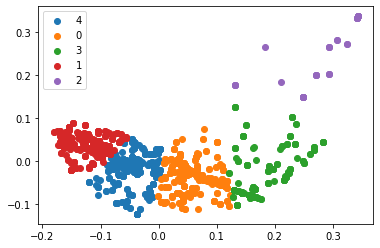

In [35]:
draw_pred(df, label)

In [36]:
label_real = find_real_predict(df_new)

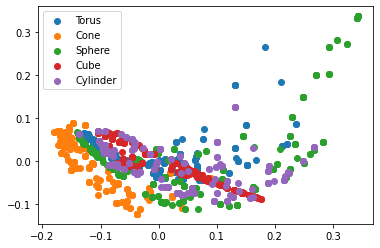

In [37]:
draw_real(df, label_real)

In [38]:
davies_bouldin_score(np.vstack(df_new['data'].values), label)

1.3990084437699326

По рисункам получили то же самое.

Теперь попробуем взять гистограмму model_bounding_sphere_strict_outer_absolute при 8 бинах.

In [39]:
dataset_3 = left_merged[(left_merged.intervals == 8) & 
                     (left_merged.type_x == 'model_bounding_sphere_strict_outer_absolute')][['type_y', 'data']]

In [40]:
df, label = find_label_predict(dataset_3)

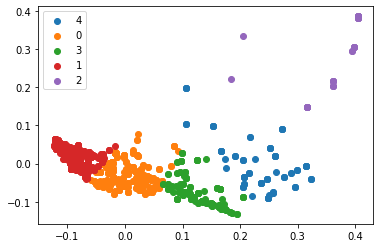

In [41]:
draw_pred(df, label)

In [42]:
label_real = find_real_predict(dataset_3)

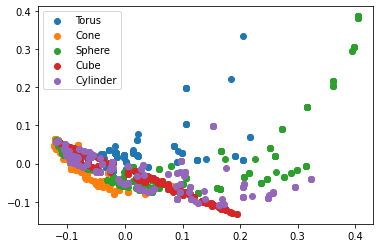

In [43]:
draw_real(df, label_real)

In [44]:
davies_bouldin_score(np.vstack(dataset_3['data'].values), label)

0.9644599585602436

Заметим, что результат получился лучше, чем раньше.

Построим для каждой гистограммы при разном количестве бинов.

In [45]:
left_merged.intervals.unique()

array([  8,  16,  32,  64, 128])

In [46]:
min_ind_db = 2

Гистограмма model_bounding_sphere_strict_outer при 8 бинах
Davies-Bouldin index = 1.0204713139412374


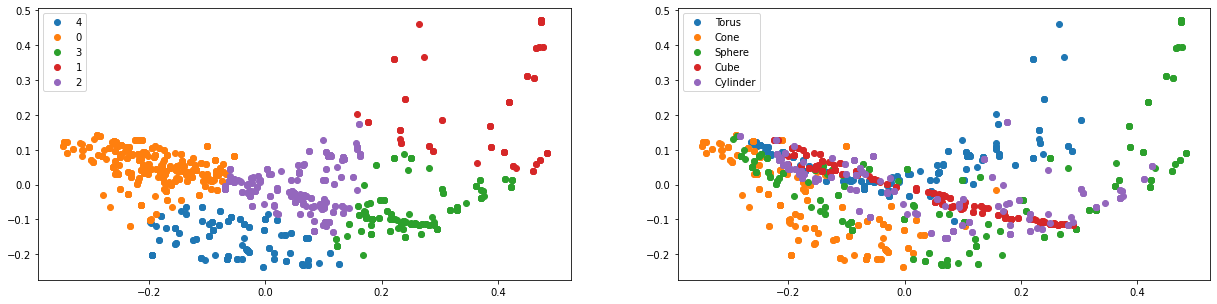

Гистограмма model_bounding_sphere_strict_outer при 16 бинах
Davies-Bouldin index = 1.1005732045412597


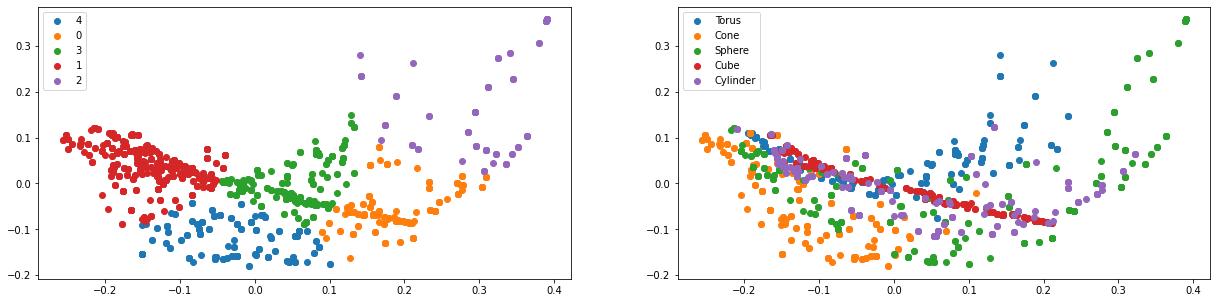

Гистограмма model_bounding_sphere_strict_outer при 32 бинах
Davies-Bouldin index = 1.1428101271821531


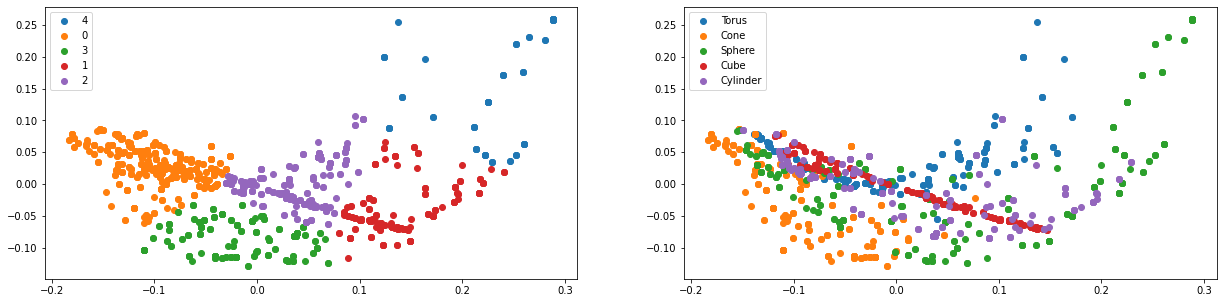

Гистограмма model_bounding_sphere_strict_outer при 64 бинах
Davies-Bouldin index = 1.16923412429495


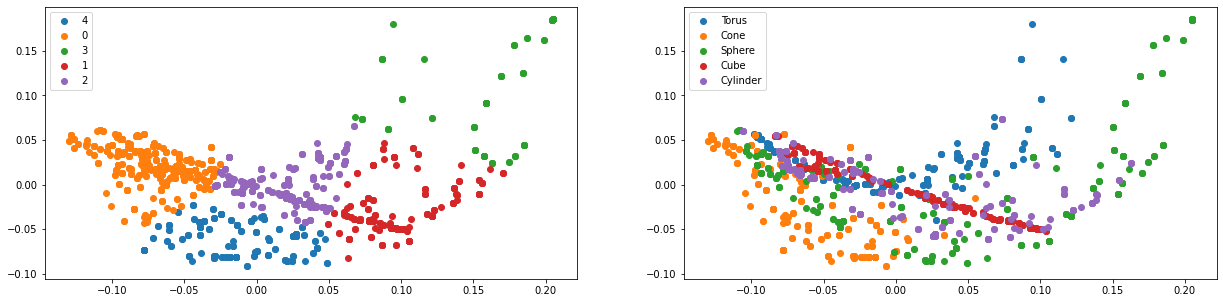

Гистограмма model_bounding_sphere_strict_outer при 128 бинах
Davies-Bouldin index = 1.1660416657552906


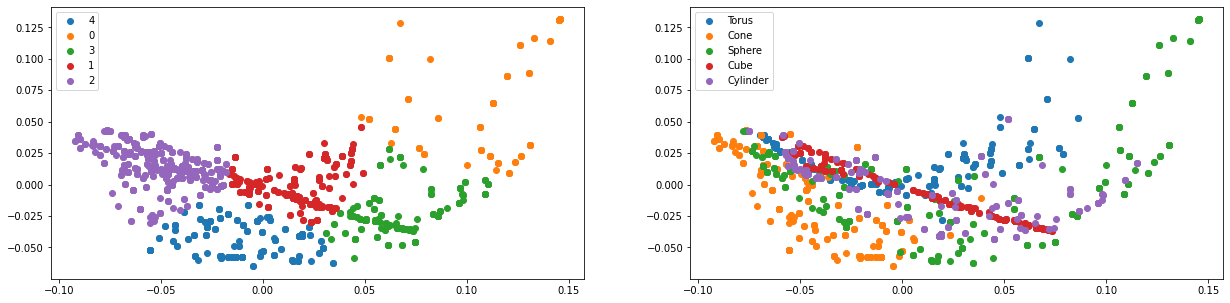

Гистограмма model_bounding_sphere_strict_outer_absolute при 8 бинах
Davies-Bouldin index = 0.9141559077140045


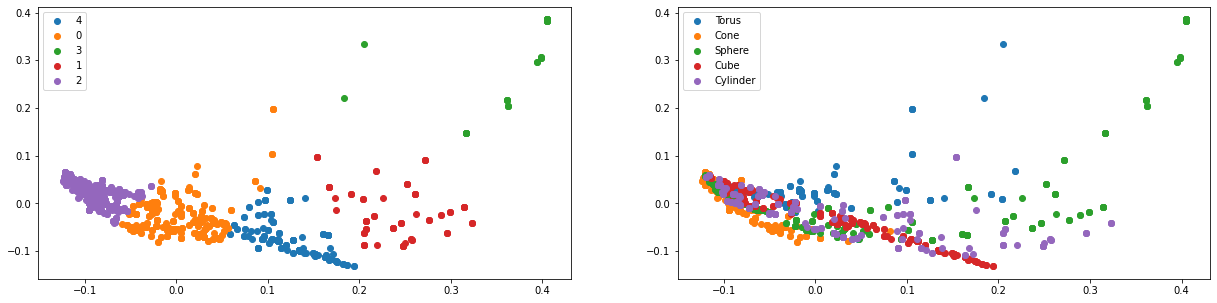

Гистограмма model_bounding_sphere_strict_outer_absolute при 16 бинах
Davies-Bouldin index = 1.0016035954648081


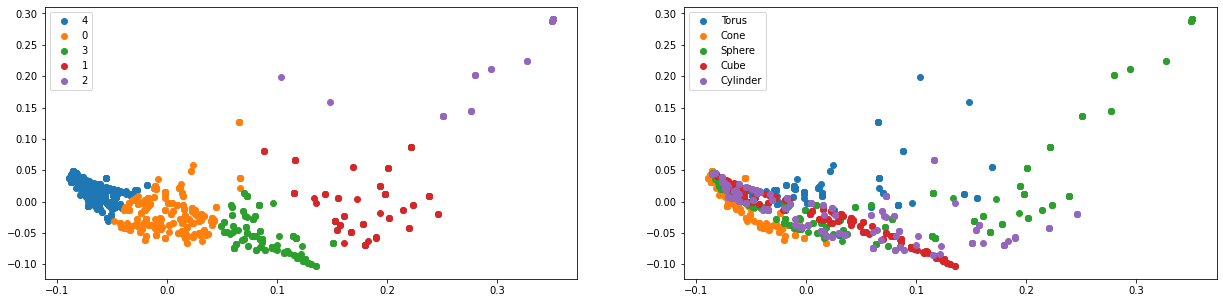

Гистограмма model_bounding_sphere_strict_outer_absolute при 32 бинах
Davies-Bouldin index = 1.0748878694983672


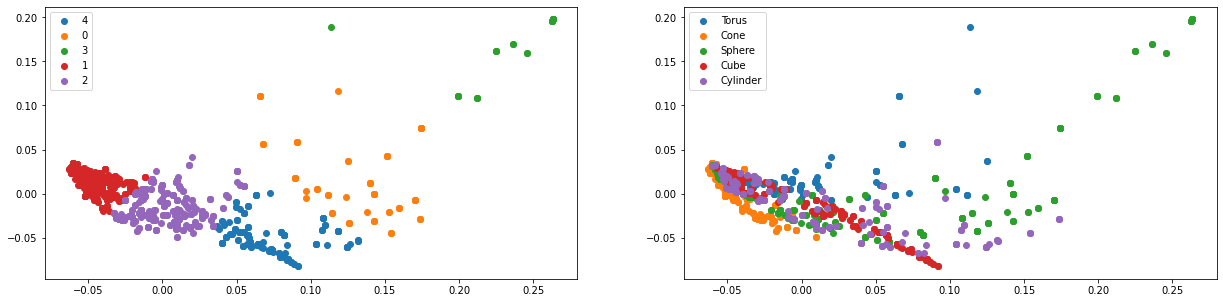

Гистограмма model_bounding_sphere_strict_outer_absolute при 64 бинах
Davies-Bouldin index = 1.0968468985752446


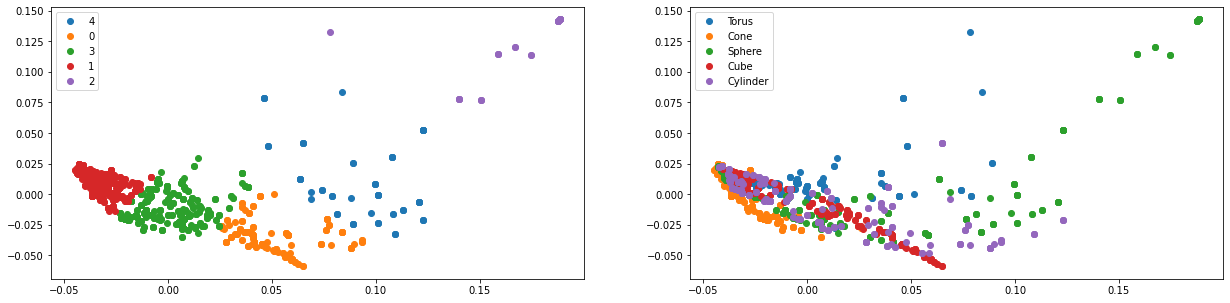

Гистограмма model_bounding_sphere_strict_outer_absolute при 128 бинах
Davies-Bouldin index = 1.1029110928197594


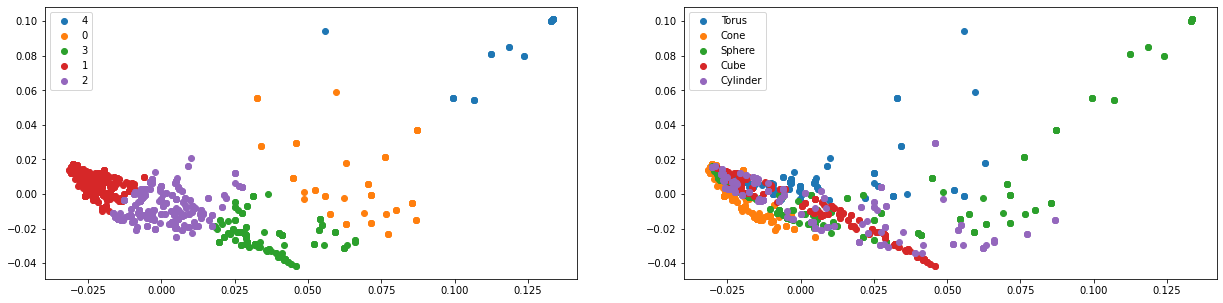

Гистограмма model_bounding_sphere_missed при 8 бинах
Davies-Bouldin index = 0.7004002367389884


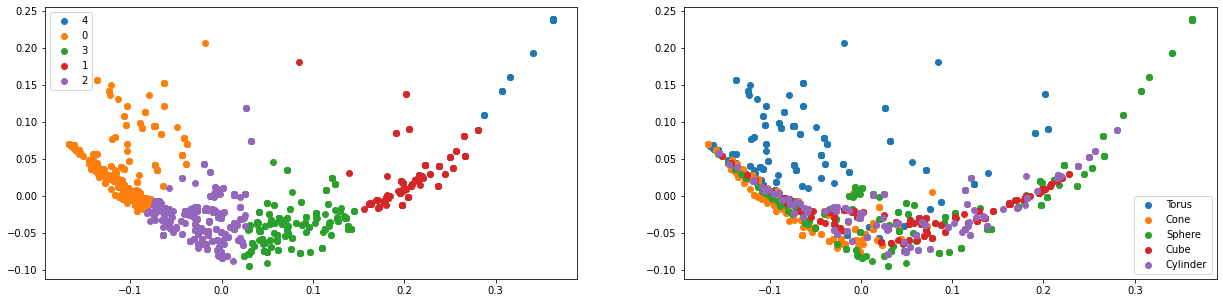

Гистограмма model_bounding_sphere_missed при 16 бинах
Davies-Bouldin index = 0.7785768015382507


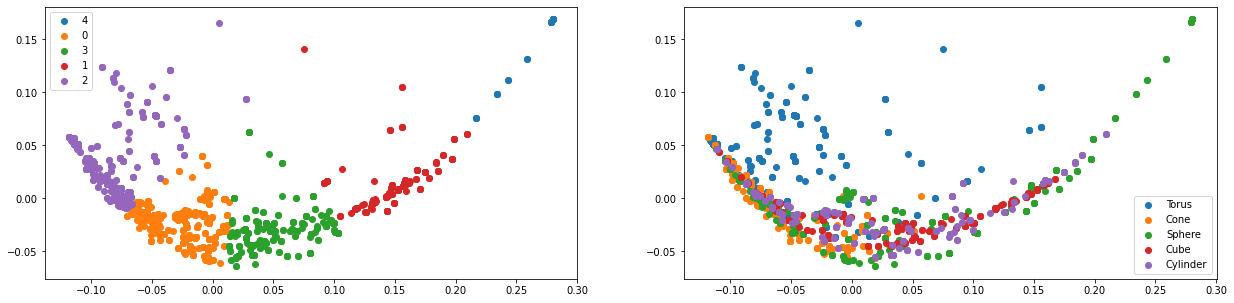

Гистограмма model_bounding_sphere_missed при 32 бинах
Davies-Bouldin index = 0.8083046241400428


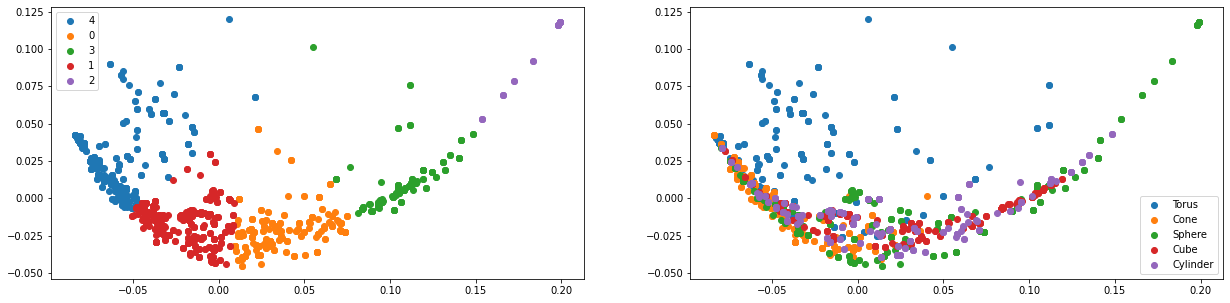

Гистограмма model_bounding_sphere_missed при 64 бинах
Davies-Bouldin index = 0.8195798371544362


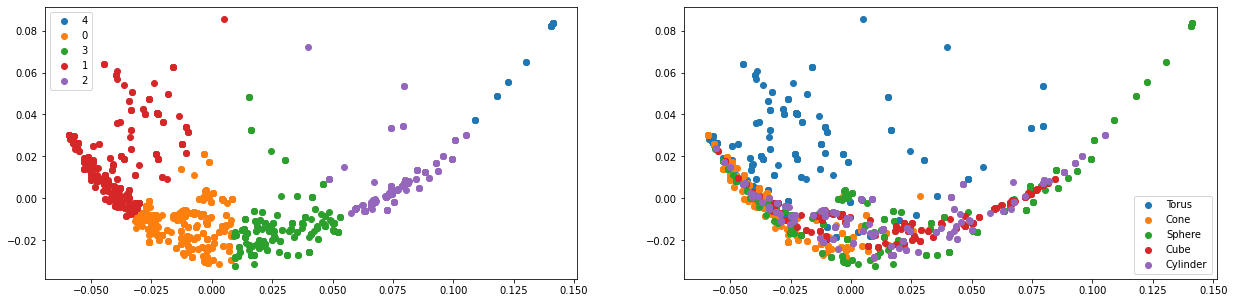

Гистограмма model_bounding_sphere_missed при 128 бинах
Davies-Bouldin index = 0.8587284259245562


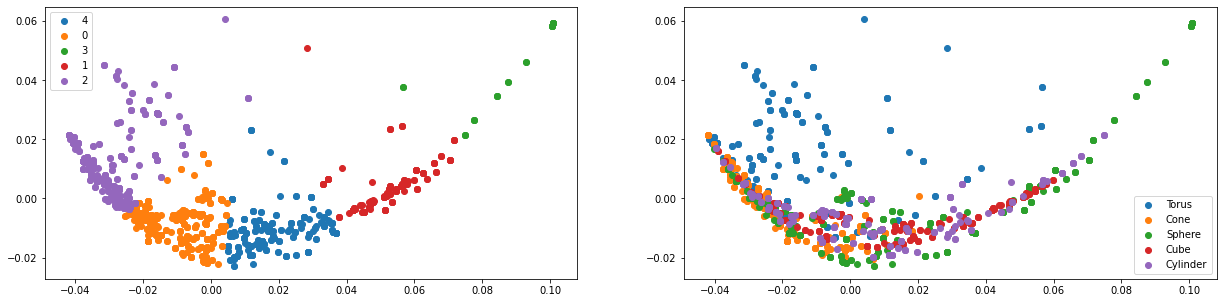

Гистограмма model_bounding_sphere_concentric_sphere при 8 бинах
Davies-Bouldin index = 1.2455184974312936


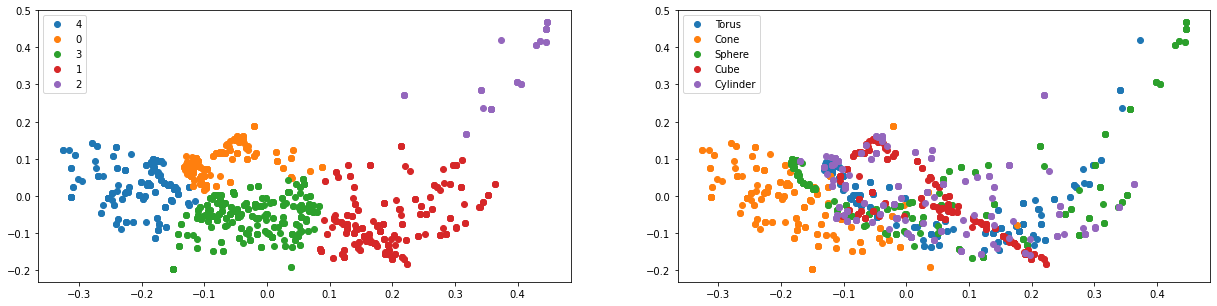

Гистограмма model_bounding_sphere_concentric_sphere при 16 бинах
Davies-Bouldin index = 1.3355486993622043


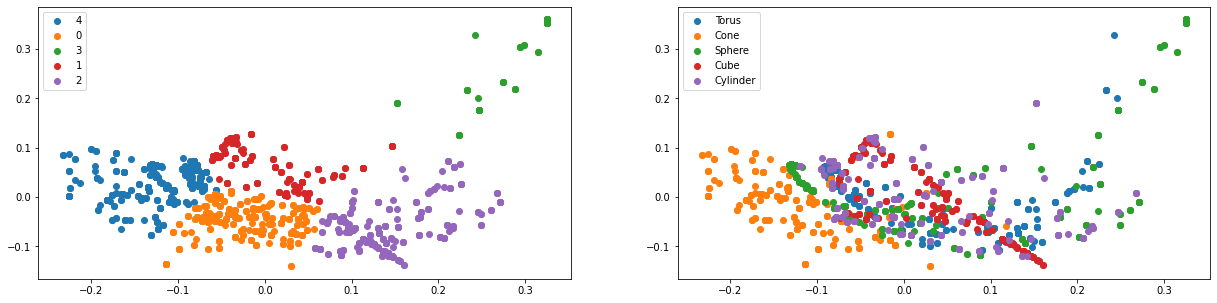

Гистограмма model_bounding_sphere_concentric_sphere при 32 бинах
Davies-Bouldin index = 1.4400015557210215


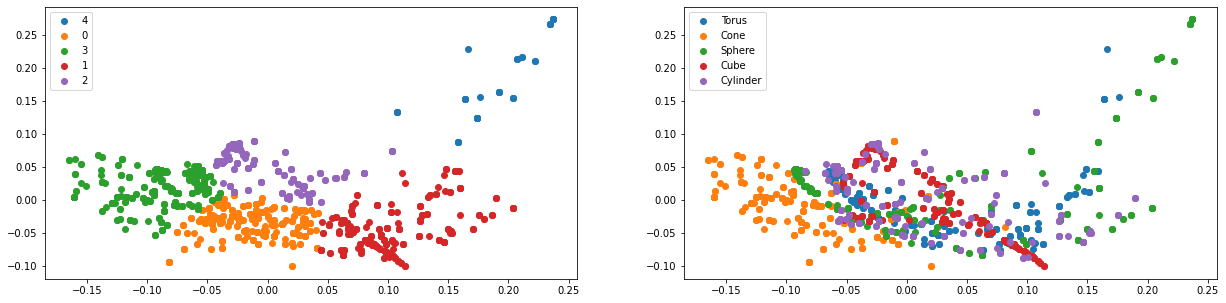

Гистограмма model_bounding_sphere_concentric_sphere при 64 бинах
Davies-Bouldin index = 1.5023511342080256


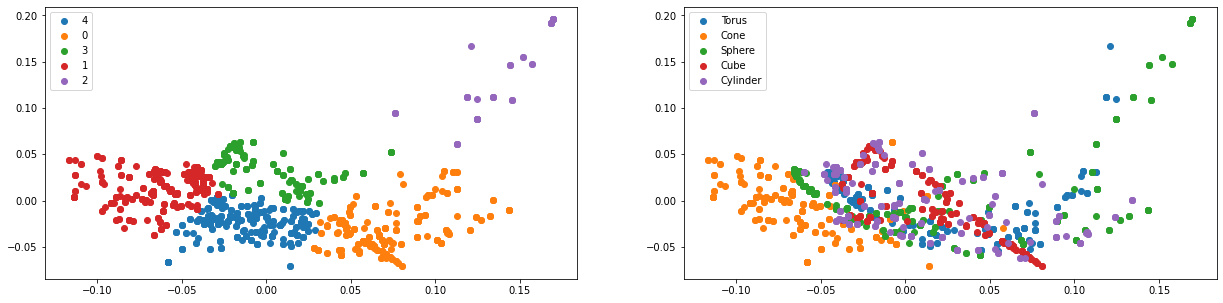

Гистограмма model_bounding_sphere_concentric_sphere при 128 бинах
Davies-Bouldin index = 1.5271186068809015


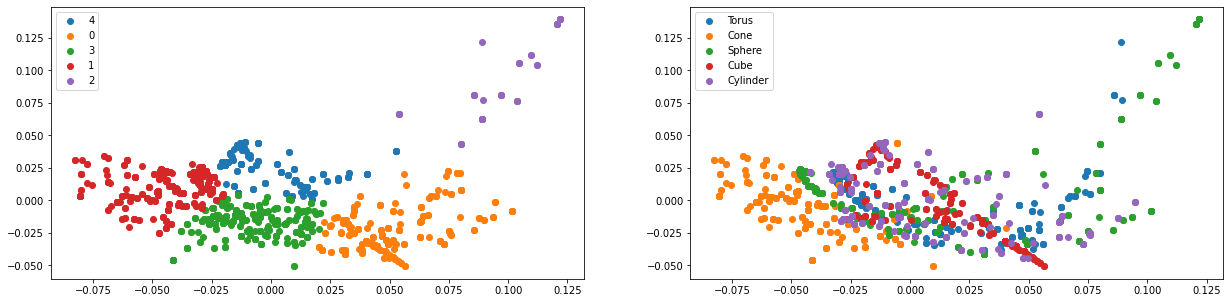

Гистограмма hull_bounding_sphere_strict_outer при 8 бинах
Davies-Bouldin index = 1.0024344832430636


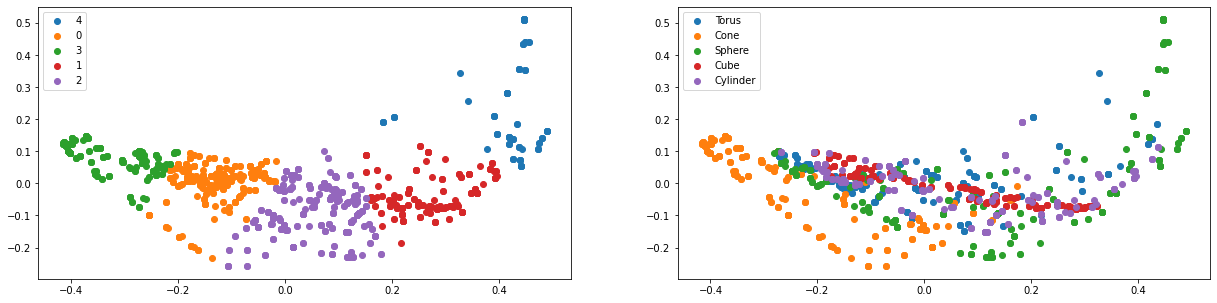

Гистограмма hull_bounding_sphere_strict_outer при 16 бинах
Davies-Bouldin index = 1.0708696456527045


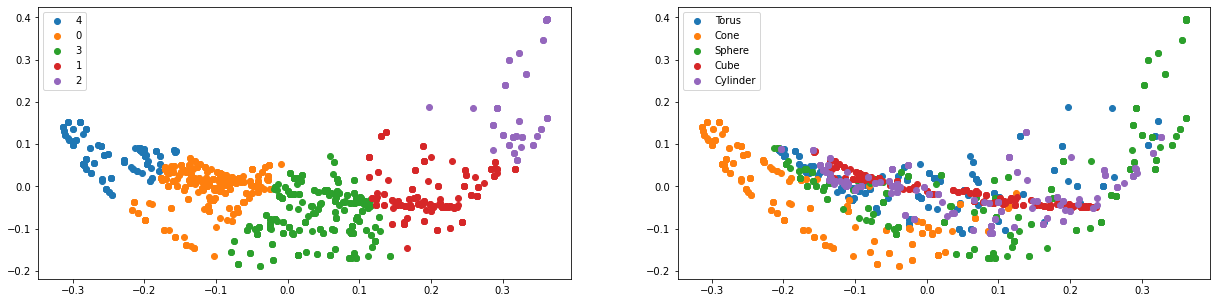

Гистограмма hull_bounding_sphere_strict_outer при 32 бинах
Davies-Bouldin index = 1.128772901051604


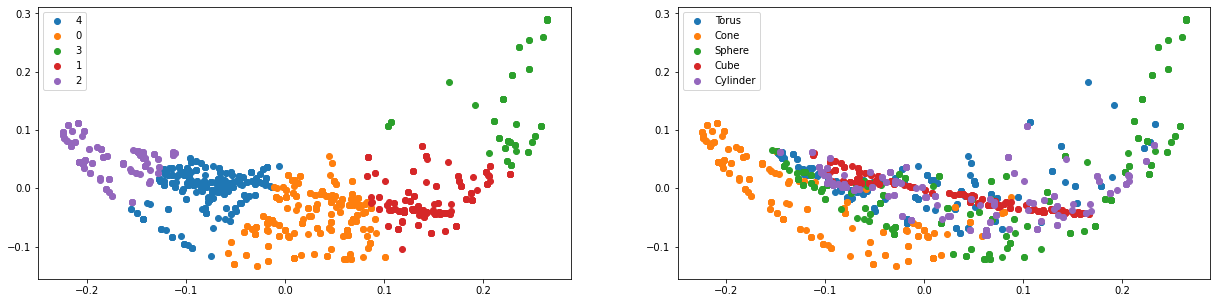

Гистограмма hull_bounding_sphere_strict_outer при 64 бинах
Davies-Bouldin index = 1.1533933115818509


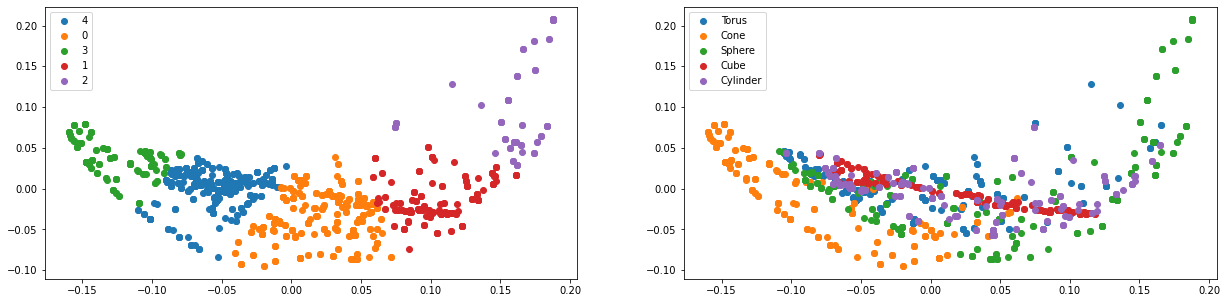

Гистограмма hull_bounding_sphere_strict_outer при 128 бинах
Davies-Bouldin index = 1.160971709240957


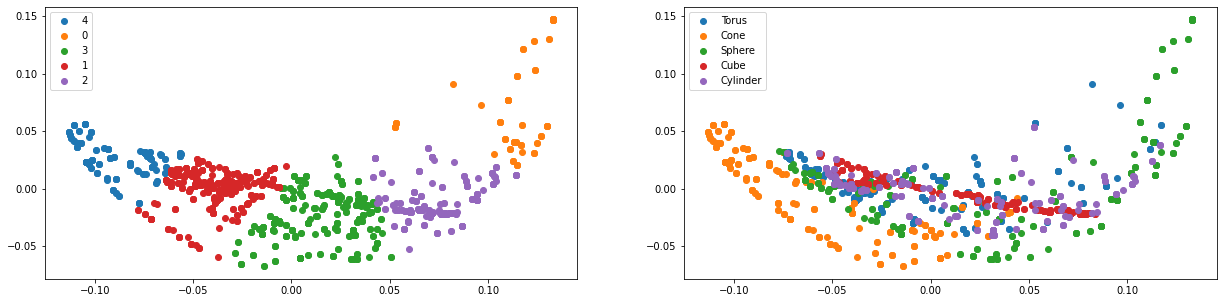

Гистограмма hull_bounding_sphere_strict_outer_absolute при 8 бинах
Davies-Bouldin index = 0.8647353154802507


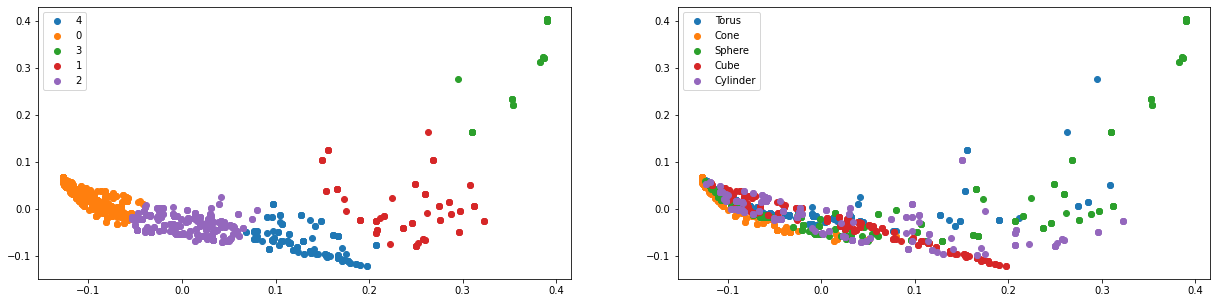

Гистограмма hull_bounding_sphere_strict_outer_absolute при 16 бинах
Davies-Bouldin index = 0.9459414799454139


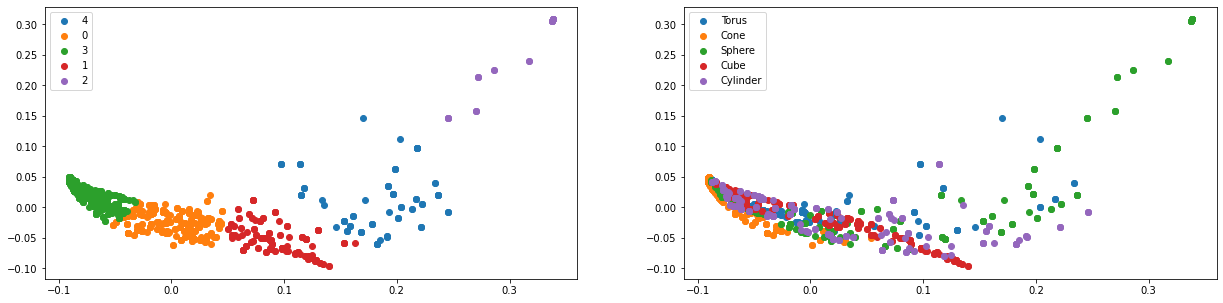

Гистограмма hull_bounding_sphere_strict_outer_absolute при 32 бинах
Davies-Bouldin index = 0.9952120640961158


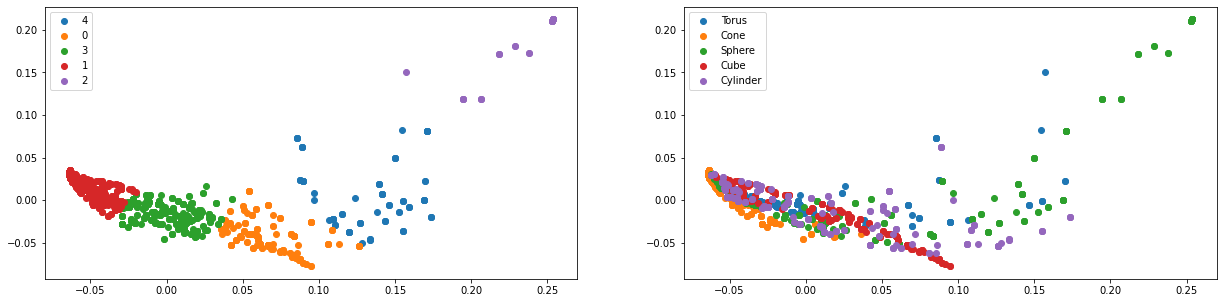

Гистограмма hull_bounding_sphere_strict_outer_absolute при 64 бинах
Davies-Bouldin index = 1.005444717621853


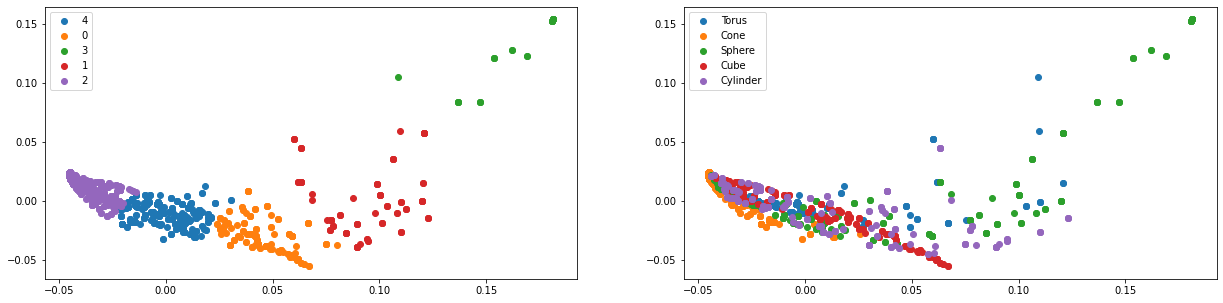

Гистограмма hull_bounding_sphere_strict_outer_absolute при 128 бинах
Davies-Bouldin index = 1.0240577972621547


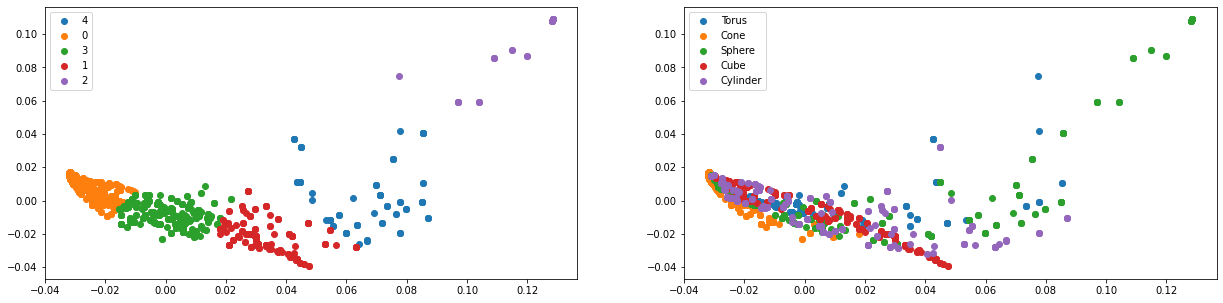

Гистограмма hull_bounding_sphere_missed при 8 бинах
Davies-Bouldin index = 0.645500893213322


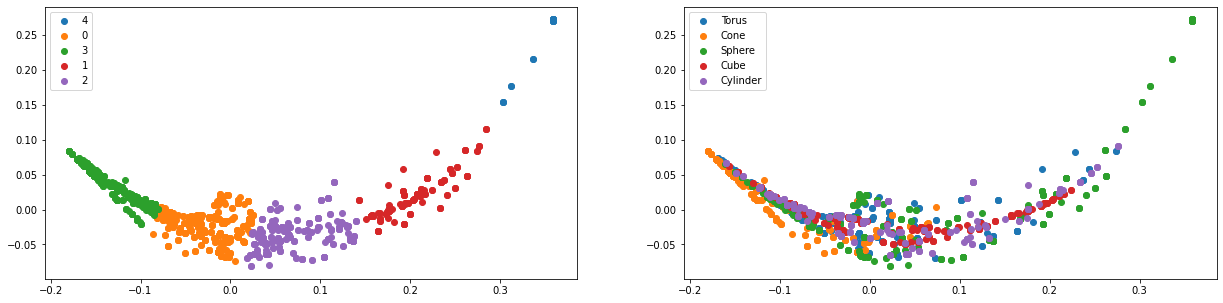

Гистограмма hull_bounding_sphere_missed при 16 бинах
Davies-Bouldin index = 0.6939378583290308


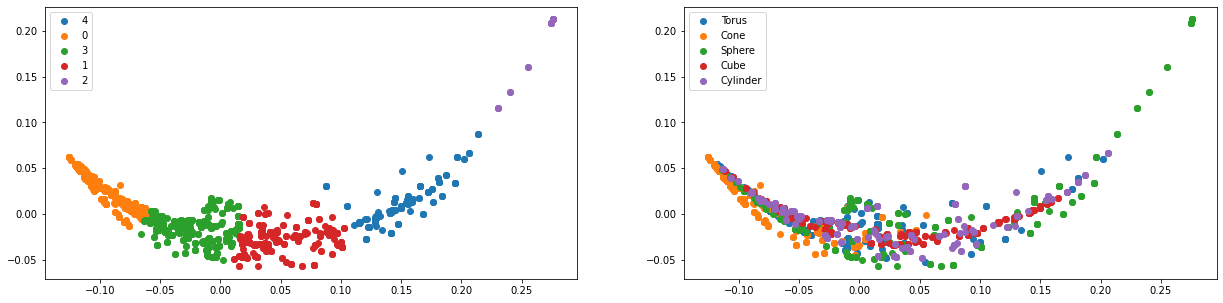

Гистограмма hull_bounding_sphere_missed при 32 бинах
Davies-Bouldin index = 0.7283187582852297


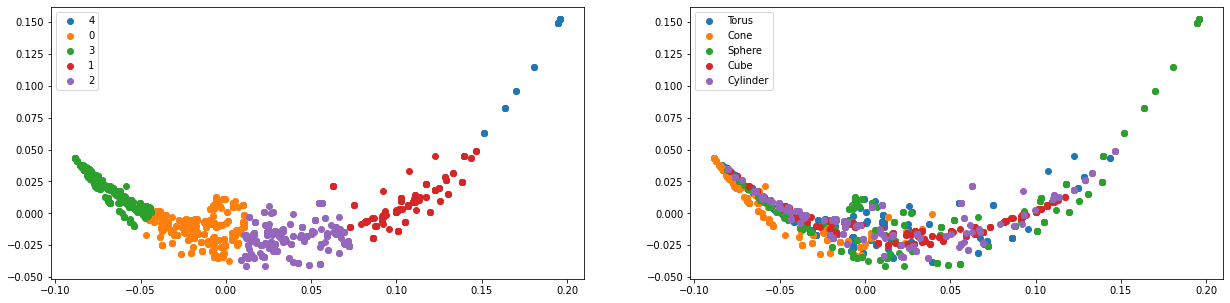

Гистограмма hull_bounding_sphere_missed при 64 бинах
Davies-Bouldin index = 0.7354002567454676


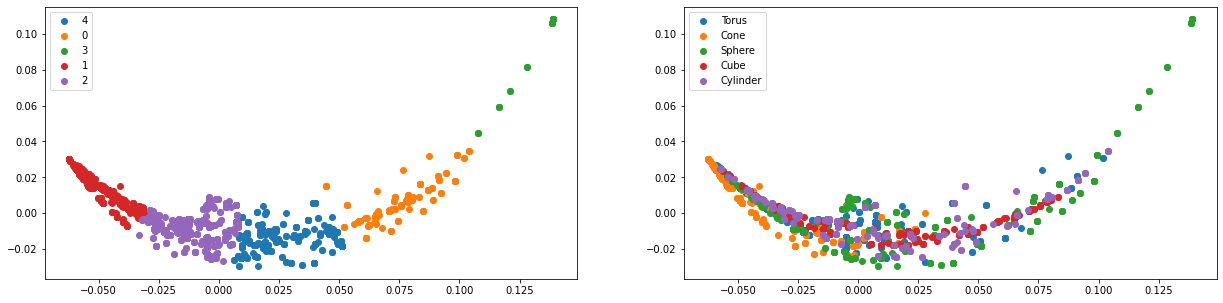

Гистограмма hull_bounding_sphere_missed при 128 бинах
Davies-Bouldin index = 0.7224363967830667


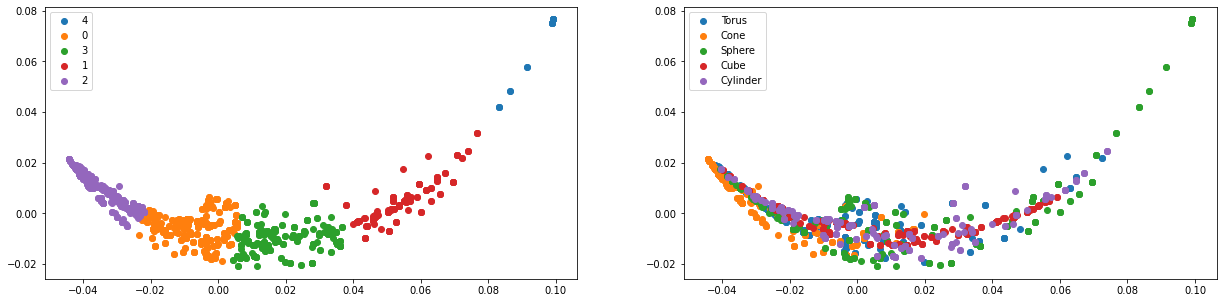

Гистограмма hull_bounding_sphere_concentric_sphere при 8 бинах
Davies-Bouldin index = 1.170676090963044


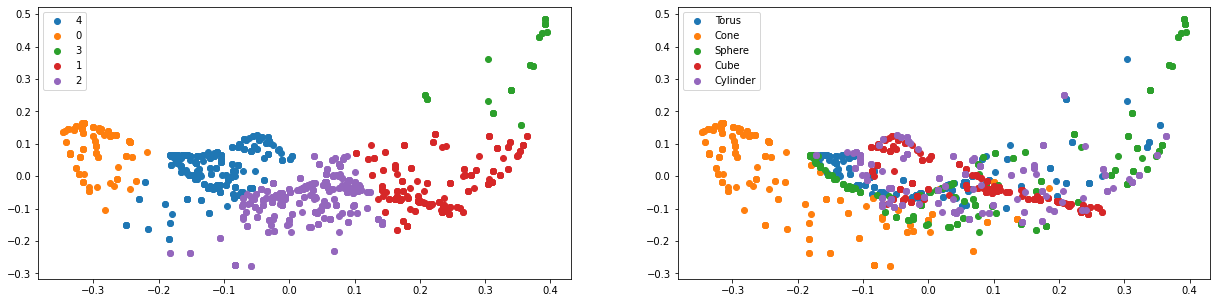

Гистограмма hull_bounding_sphere_concentric_sphere при 16 бинах
Davies-Bouldin index = 1.3618168244793467


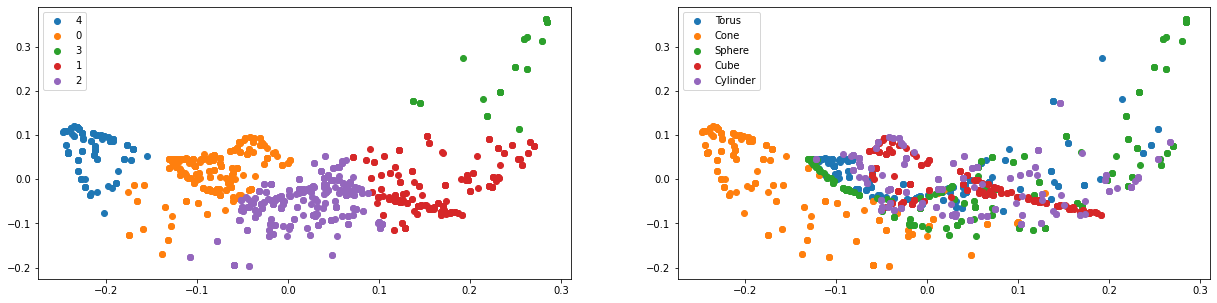

Гистограмма hull_bounding_sphere_concentric_sphere при 32 бинах
Davies-Bouldin index = 1.465771368270673


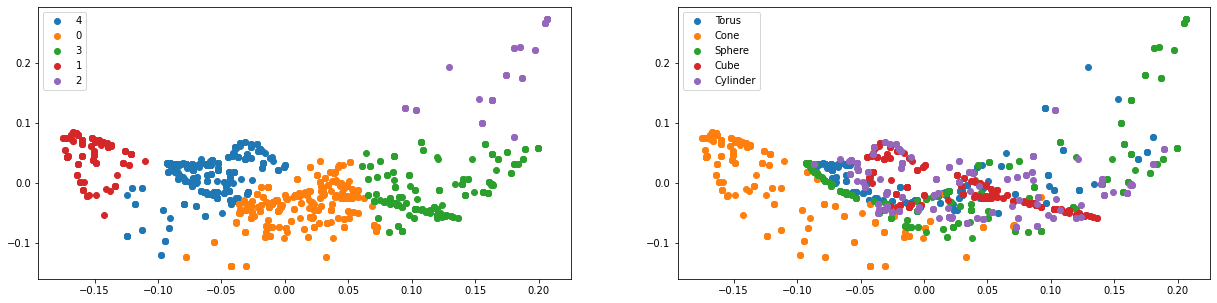

Гистограмма hull_bounding_sphere_concentric_sphere при 64 бинах
Davies-Bouldin index = 1.5087722888268325


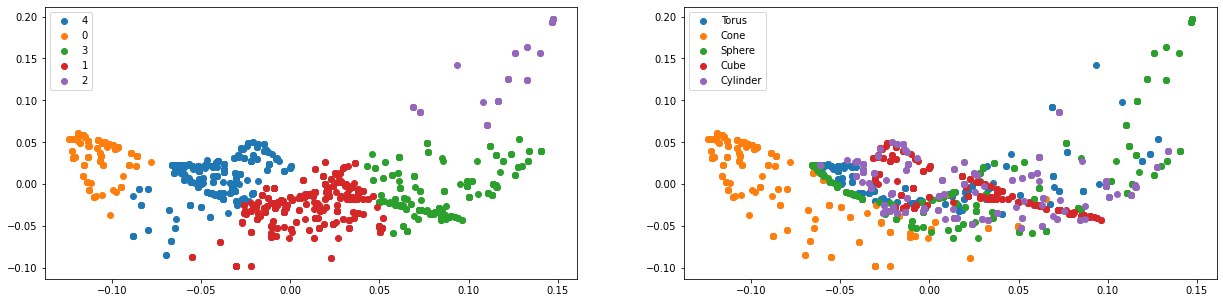

Гистограмма hull_bounding_sphere_concentric_sphere при 128 бинах
Davies-Bouldin index = 1.5473885513117032


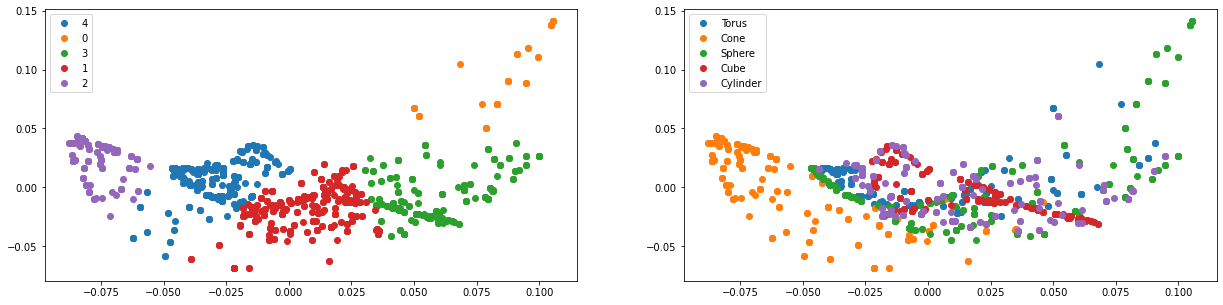

In [47]:
for i in left_merged.type_x.unique():
    for j in left_merged.intervals.unique():
        dataset = left_merged[(left_merged.intervals == j) & 
                     (left_merged.type_x == i)][['type_y', 'data']]
        df, label = find_label_predict(dataset)
        label_real = find_real_predict(dataset)
        print(f'Гистограмма {i} при {j} бинах')
        d_b_index = davies_bouldin_score(np.vstack(dataset['data'].values), label)
        print('Davies-Bouldin index =', d_b_index)
        if d_b_index <= min_ind_db:
            min_ind_db = d_b_index
            min_hist = i
            min_bin = j
        fig, axs = plt.subplots(1, 2, figsize=(21,5))
        for l in unique_coded_labels:
            axs[0].scatter(df[label == l , 0] , df[label == l , 1] , label = l)
        axs[0].legend()
        
        for lc in unique_coded_labels:
            axs[1].scatter(df[label_real == lc , 0] , df[label_real == lc , 1] , label = lc)
        axs[1].legend(labels=unique_labels)
        plt.show()        

Лучший результат получился при следующих параметрах.

In [48]:
min_hist, min_bin

('hull_bounding_sphere_missed', 8)

In [49]:
dataset = left_merged[(left_merged.intervals == min_bin) & 
                     (left_merged.type_x == min_hist)][['type_y', 'data']]

In [50]:
df, label = find_label_predict(dataset)

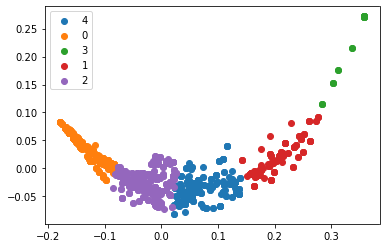

In [51]:
draw_pred(df, label)

In [52]:
label_real = find_real_predict(dataset)

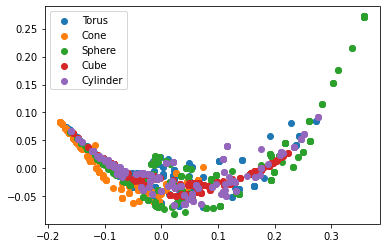

In [53]:
draw_real(df, label_real)

In [54]:
davies_bouldin_score(np.vstack(dataset['data'].values), label)

0.6613370419250565